# Imports

In [135]:
import pickle
# further imports go here
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix    
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score




# Load Data

In [136]:
TRAIN_PATH = './train_set_top_5.pkl'
TEST_PATH = './test_set_top_5.pkl'

In [137]:
df_train = pd.read_pickle(TRAIN_PATH)
df_test = pd.read_pickle(TEST_PATH)

In [4]:
with open('train_set_top_5.pkl', 'rb') as f:
    train_set_top_5 = pickle.load(f)

with open('test_set_top_5.pkl', 'rb') as f:
    test_set_top_5 = pickle.load(f)



In [138]:
df_train = pd.DataFrame.from_dict(df_train)
df_test = pd.DataFrame.from_dict(df_test)


# Inspect Labels

In [6]:
import collections
labels = [el["cuisine"] for el in train_set_top_5]
sorted(collections.Counter(labels).items(), key=lambda x: x[1], reverse=True)

[('italian', 6294),
 ('mexican', 5133),
 ('southern_us', 3445),
 ('indian', 2435),
 ('chinese', 2110)]

In [7]:
df_train

,id,cuisine,ingredients
0,14215,italian,"[bread crumbs, large eggs, all-purpose flour, ..."
1,13633,italian,"[black pepper, salt, tomatoes, large eggs, red..."
2,33001,indian,"[water, oil, semolina, cardamom, Nido Milk Pow..."
3,14726,southern_us,"[parmesan cheese, salt, water, tomato salsa, b..."
4,22902,mexican,"[vegetable oil, water, long-grain rice, salt, ..."
...,...,...,...
19412,20004,mexican,"[plain yogurt, Mexican cheese blend, dried dil..."
19413,36416,southern_us,"[eggs, Mexican cheese blend, bacon, milk, jala..."
19414,2054,mexican,"[reduced fat monterey jack cheese, flour torti..."
19415,22887,italian,"[grated parmesan cheese, sausages, dried orega..."


In [139]:
# all unique ingredients

def get_ingredients(series):
    return pd.Series([x for _list in series for x in _list])



In [140]:
get_ingredients(df_train['ingredients']).value_counts()

salt                     9022
olive oil                4120
onions                   3800
garlic                   3626
water                    3348
                         ... 
nut meal                    1
salted roasted pecans       1
braising beef               1
marshmallow vodka           1
green apples                1
Length: 5058, dtype: int64

In [141]:
#-----------------------------------------------------------------------#
#    Chart does not load on github. Run it locally to view the chart    #
#-----------------------------------------------------------------------#


fig = px.bar(get_ingredients(df_train['ingredients']).value_counts()[0:700])
fig.show()



In [11]:
# This was a manual way to reduce features, PCA performed better 

# most_relevant = get_ingredients(df_train['ingredients']).value_counts()[:700]

We can see that there are a lot of ingredients in this dataset but not all ingredients from the training dataset are in the test dataset.

<AxesSubplot:xlabel='count', ylabel='cuisine'>

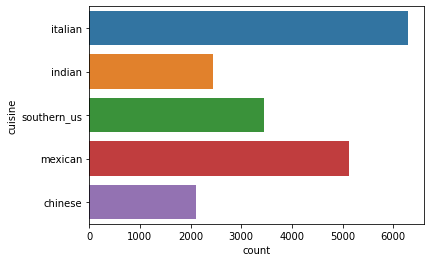

In [107]:
sns.countplot(y=df_train['cuisine'])

# Preprocessing & Feature Engineering

In [13]:
# Write your preprocessing and feature engineering code

In [142]:
y = df_train['cuisine']
x = df_train.drop(['cuisine', 'id'],1)

In [143]:
# transform to multilabel format
mlb = MultiLabelBinarizer()

x_trans = x.join(pd.DataFrame(mlb.fit_transform(x.pop('ingredients')),
                          columns=mlb.classes_,
                          index=x.index))


In [16]:
x_trans

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yuca,yukon gold,yukon gold potatoes,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
y_test = df_test['cuisine']
x_test = df_test.drop(['cuisine', 'id'],1)

In [145]:
# transform to multilabel format
mlb = MultiLabelBinarizer()

x_trans_test = x_test.join(pd.DataFrame(mlb.fit_transform(x_test.pop('ingredients')),
                          columns=mlb.classes_,
                          index=x_test.index))

In [15]:
x_trans_test

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,(14.5 oz.) diced tomatoes,1% low-fat cottage cheese,1% low-fat milk,2% reduced-fat milk,33% less sodium cooked deli ham,40% less sodium taco seasoning,Alfredo sauce,...,yellow summer squash,yellow tomato,yoghurt,yolk,yu choy,yukon gold potatoes,zest,zesty italian dressing,ziti,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# This was a manual way to reduce features, PCA performed better 

#x_trans.drop(x_trans.columns.difference(most_relevant.index), 1, inplace=True)

In [21]:
# This was a manual way to reduce features, PCA performed better 

#x_trans_test.drop(x_trans_test.columns.difference(most_relevant.index), 1, inplace=True)

We can see that the trainings data is a little bit imbalanced, for example there are 3 times more records of italian recipes than chinese recipes. We can balance this with SMOTE.

In [22]:
# ---------------------
# Did not improve score
# ---------------------

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# over = SMOTE(sampling_strategy='auto', random_state=1703)
# under = RandomUnderSampler(sampling_strategy='auto')
# pipeline = Pipeline([('o', over), ('u', under)])

# x_train_smote, y_train_smote = pipeline.fit_resample(x_trans.copy(), y.copy())
# sns.countplot(y=y_train_smote)


In [23]:
x_trans

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yuca,yukon gold,yukon gold potatoes,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
full_dataset = x_trans.append(x_trans_test, ignore_index=True)


In [147]:
full_dataset = full_dataset.fillna(0)

In [26]:
number_of_components = len(full_dataset.columns)

pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(full_dataset)

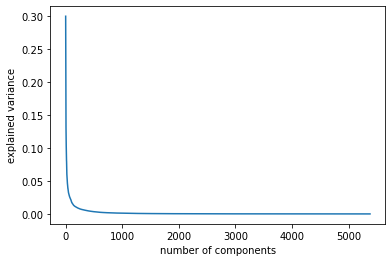

In [ ]:
plt.plot(pca_model.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

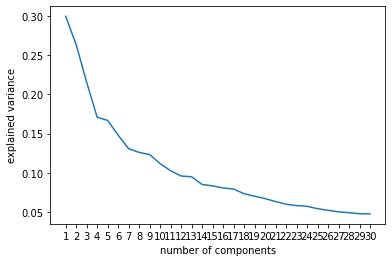

In [ ]:
EV = pca_model.explained_variance_[0:30]

plt.plot(EV)


plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(EV)), np.arange(1, len(EV)+1))  #Otherwise the x-axis starts at 1)
plt.show()


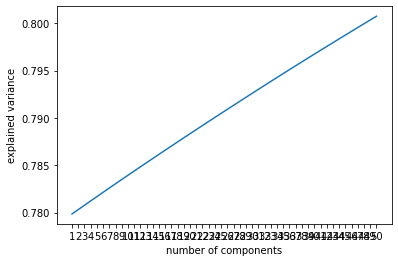

In [ ]:
CS = np.cumsum(pca_model.explained_variance_ratio_)[400:450]
plt.plot(CS)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(CS)), np.arange(1, len(CS)+1))

plt.show()
#450 is +/-80 procent of explained variance 

In [148]:
pca_model = PCA(n_components=450, svd_solver='full')
pca_model.fit(full_dataset)
pca_data= pca_model.transform(full_dataset)

In [149]:
pca_data_train = pca_data[:len(x_trans)]
pca_data_test = pca_data[len(x_trans):]

# Training: Choose your poison
**Goal: predict the label 'cuisine' from the ingredients.**



## KNN

In [150]:
x_train, x_val, y_train, y_val = train_test_split(pca_data_train,y, test_size=0.2, random_state=1234)

In [ ]:
prec_scorer = make_scorer(metrics.accuracy_score)
n_neighbors = np.arange(1,30)
param_grid = {'n_neighbors': n_neighbors}
knn = KNeighborsClassifier( )
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, scoring=prec_scorer ,cv = 3,  verbose=2, n_jobs = -1)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 29 candidates, totalling 87 fits


{'n_neighbors': 9}

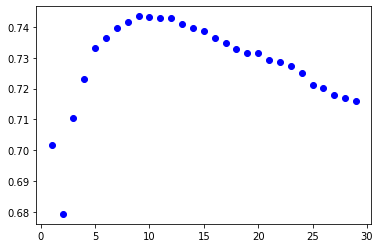

In [ ]:
out2 = pd.DataFrame(grid_search.cv_results_)
xlabel_names = ['n_neighbors']
plt.scatter(out2['param_n_neighbors'], out2['mean_test_score'], c='blue')

In [ ]:
y_pred_knn = grid_search.predict(x_val)
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

     chinese       0.92      0.79      0.85       428
      indian       0.80      0.70      0.74       496
     italian       0.73      0.86      0.79      1242
     mexican       0.88      0.71      0.78      1025
 southern_us       0.62      0.70      0.66       693

    accuracy                           0.76      3884
   macro avg       0.79      0.75      0.76      3884
weighted avg       0.78      0.76      0.76      3884



## Logistic regression

In [151]:
logreg = LogisticRegression(C=10000, max_iter=200) 
logreg.fit(x_train, y_train)

C:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=10000, max_iter=200)

In [152]:
print(logreg.score(x_train, y_train))
print(logreg.score(x_val, y_val))

0.9425094959119295
0.8918640576725025


In [153]:
y_val_pred = logreg.predict(x_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

     chinese       0.89      0.92      0.90       428
      indian       0.90      0.91      0.91       496
     italian       0.91      0.90      0.90      1242
     mexican       0.93      0.90      0.92      1025
 southern_us       0.81      0.82      0.82       693

    accuracy                           0.89      3884
   macro avg       0.89      0.89      0.89      3884
weighted avg       0.89      0.89      0.89      3884



# Evaluation:

## Performance Metrics


## KNN

In [ ]:
y_pred_knn_test = grid_search.predict(pca_data_test)
print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

     chinese       0.92      0.75      0.82       563
      indian       0.81      0.74      0.77       568
     italian       0.74      0.88      0.80      1544
     mexican       0.86      0.71      0.78      1305
 southern_us       0.63      0.70      0.66       875

    accuracy                           0.77      4855
   macro avg       0.79      0.75      0.77      4855
weighted avg       0.78      0.77      0.77      4855



## Logistic regression

In [154]:
y_log_pred_test = logreg.predict(pca_data_test)
print(classification_report(y_test, y_log_pred_test))

              precision    recall  f1-score   support

     chinese       0.90      0.89      0.90       563
      indian       0.89      0.91      0.90       568
     italian       0.91      0.92      0.92      1544
     mexican       0.92      0.91      0.91      1305
 southern_us       0.82      0.81      0.82       875

    accuracy                           0.89      4855
   macro avg       0.89      0.89      0.89      4855
weighted avg       0.89      0.89      0.89      4855



We can see the logistic regression performed better, so we will use that.
I would go for a GBM in first instance but for computation time I just did KNN and logistic regression.

In [155]:
y_log_pred_test = logreg.predict(pca_data_test)
y_log_pred_test

array(['southern_us', 'mexican', 'indian', ..., 'southern_us', 'chinese',
       'mexican'], dtype=object)

## Confusion Matrix

[Text(0, 0.5, 'Chinese'),
 Text(0, 1.5, 'Indian'),
 Text(0, 2.5, 'Italian'),
 Text(0, 3.5, 'Mexican'),
 Text(0, 4.5, 'Southern_us')]

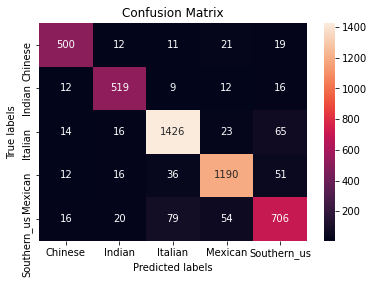

In [156]:
# write code to plot a confusion matrix


confusion_matrix = confusion_matrix(y_test, y_log_pred_test)

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Chinese', 'Indian', 'Italian', 'Mexican', 'Southern_us']); ax.yaxis.set_ticklabels(['Chinese', 'Indian', 'Italian', 'Mexican', 'Southern_us'])

## ROC Curve

In [157]:
y_dense_test = LabelBinarizer().fit_transform(y_test)

In [158]:
y_test_pred_prob = logreg.predict_proba(pca_data_test)

In [159]:
n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_dense_test[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_dense_test.ravel(), y_test_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-163-5d81e602536a>:9: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



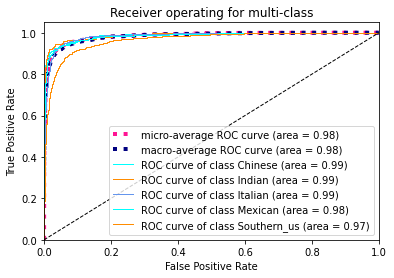

In [163]:
classes = ['Chinese', 'Indian', 'Italian', 'Mexican', 'Southern_us']

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating for multi-class')
plt.legend(loc="lower right")
plt.show()